# 0614 지도 추가 진행 + 의견

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df1=pd.read_csv('seoul(1).csv', encoding='cp949')

In [12]:
df1

,Unnamed: 0,자치구,승차,하차,승하차,13시,14시,15시,16시,노인인구,...,요양시설수,요양시설정원,요양시설현원,요양시설종사자수,노인복지시설수,노인복지종사자수,경로당,노인교실,노인일자리시설수,노인일자리종사자수
0,0,송파구,7809263,7731435,15540698,9240,9121,8781,8395,"93,309",...,8,658,614,441,3,48,172,17,1,9
1,1,강남구,8932277,8492772,17425049,9005,9164,9114,8591,"74,959",...,4,215,63,48,6,94,167,22,1,7
2,2,강동구,5805253,5776344,11581597,7153,6515,6422,5840,"69,903",...,8,495,372,258,3,139,121,10,1,7
3,3,서초구,5928950,5767127,11696077,7060,7468,7403,7064,"60,072",...,4,322,305,215,4,130,141,6,0,0
4,4,노원구,6191740,6143127,12334867,6502,6309,5984,5504,"85,420",...,11,884,808,533,3,125,243,13,1,6
5,5,강서구,4163305,4153899,8317204,6383,6154,5940,5430,"88,733",...,18,"1,017",933,619,5,97,218,25,1,6
6,6,영등포구,3214584,3234031,6448615,6063,6526,6678,6617,"60,663",...,1,118,116,87,1,27,174,27,1,6
7,7,관악구,4610636,4625957,9236593,5519,5552,5444,5232,"78,430",...,10,435,405,296,1,33,114,19,1,6
8,8,성북구,3251709,3215300,6467009,5484,5462,5274,4896,"73,613",...,16,715,613,400,6,110,175,9,1,6
9,9,은평구,6164368,6196836,12361204,5483,5240,4925,4768,"85,010",...,15,"1,070",986,639,7,170,154,17,1,6


In [15]:
from sklearn.linear_model import LinearRegression
# 예측에 사용할 특성 열 선택
features = ['노인인구', '양로시설수', '요양시설수', '노인복지시설수']

# 훈련 데이터 준비
X = df1[features]
y = df1['노인복지시설수']

# 쉼표 제거
X = X.replace(',', '', regex=True)
y = y.replace(',', '', regex=True)

# 데이터 타입 변환
X = X.astype(float)
y = y.astype(float)

# 모델 훈련
model = LinearRegression()
model.fit(X, y)

# 증설 필요성 예측
predictions = model.predict(X)

# 예측 결과를 데이터프레임에 추가
df1['노인복지시설수_예측'] = predictions

# 예측 결과 확인
df1[['자치구', '노인복지시설수', '노인복지시설수_예측']]


,자치구,노인복지시설수,노인복지시설수_예측
0,송파구,3,3.0
1,강남구,6,6.0
2,강동구,3,3.0
3,서초구,4,4.0
4,노원구,3,3.0
5,강서구,5,5.0
6,영등포구,1,1.0
7,관악구,1,1.0
8,성북구,6,6.0
9,은평구,7,7.0


In [17]:
import folium
import pandas as pd
import geopandas as gpd

# 서울시 자치구 경계 데이터 로드
seoul_geojson = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
seoul_gdf = gpd.read_file(seoul_geojson)

# 자치구별 예측 결과 데이터와 자치구 경계 데이터 병합
merged_data = seoul_gdf.merge(df1[['자치구', '노인복지시설수_예측']], left_on='name', right_on='자치구', how='left')

# 지도 생성
m = folium.Map(location=[37.5502, 126.982], zoom_start=11)

# 예측 결과를 지도상에 표시
folium.Choropleth(
    geo_data=merged_data,
    name='노인 인프라 예측',
    data=merged_data,
    columns=['name', '노인복지시설수_예측'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='노인 복지 시설 예측',
    highlight=True
).add_to(m)

# 자치구 이름 표시
for idx, row in merged_data.iterrows():
    centroid = row['geometry'].centroid
    folium.Marker(
        location=[centroid.y, centroid.x],
        tooltip=row['name']
    ).add_to(m)

# 범례 추가
legend_html = '''
     <div style="position: fixed;
                 bottom: 50px; left: 50px; width: 120px; height: 90px;
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color: white;
                 ">     
     &nbsp; 예측값 <br>
     &nbsp; 최소값 &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i><br>
     &nbsp; 최대값 &nbsp; <i class="fa fa-map-marker fa-2x" style="color:orange"></i>
      </div>
     '''

m.get_root().html.add_child(folium.Element(legend_html))

# 지도 출력
m


1. 노인 복지 시설 위치 안내
- 이 지도를 활용하여 노인 복지 시설이 부족한 자치구를 파악하고, 해당 자치구 내에서 노인 복지 시설의 위치를 안내하는 서비스를 개발할 수 있다. 이를 통해 노인들과 그들을 돌보는 가족들이 쉽게 복지 시설을 찾을 수 있도록 한다.

2. 우선순위에 따른 자치구 별 개발 계획 수립: 
- 예측 결과를 기반으로 자치구별로 노인 복지 시설의 부족 정도를 파악할 수 있다. 이 정보를 활용하여 정책 기획자나 지자체 관계자들은 어떤 자치구에 어떤 종류의 노인 복지 시설을 개발해야 하는지 우선순위를 정하도록 한있다.

3. 홍보 및 광고 타겟 설정
- 예측 결과를 바탕으로 자치구별로 노인 복지 시설의 수요와 공급 상태를 파악할 수 있다. 이를 통해 노인 복지 시설을 운영하는 비영리 단체나 기업들은 타겟 마케팅 및 광고 활동을 효율적으로 진행할 수 있다.

4. 지역별 노인 복지 시설 투자 분석
- 예측 결과를 활용하여 특정 자치구의 노인 복지 시설 투자 분석을 수행할 수 있다. 예를 들어, 예측 결과를 바탕으로 노인 인구가 증가할 것으로 예상되는 자치구에 투자하는 것이 비즈니스적으로 유리한지 판단할 수 있다.

# 1. 노인 복지 시설 위치 안내 서비스

In [18]:
import folium
import pandas as pd

# 서울시 자치구 경계 데이터 로드
seoul_geojson = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
seoul_gdf = gpd.read_file(seoul_geojson)

# 자치구별 예측 결과 데이터와 자치구 경계 데이터 병합
merged_data = seoul_gdf.merge(df1[['자치구', '노인복지시설수_예측']], left_on='name', right_on='자치구', how='left')

# 지도 생성
m = folium.Map(location=[37.5502, 126.982], zoom_start=11)

# 노인 복지 시설 위치 표시
for idx, row in merged_data.iterrows():
    centroid = row['geometry'].centroid
    folium.Marker(
        location=[centroid.y, centroid.x],
        tooltip=row['name'],
        popup=f"자치구: {row['자치구']}<br>노인 복지시설 예측값: {row['노인복지시설수_예측']}"
    ).add_to(m)

# 지도 출력
m


- 예측 결과를 지도에 표시하고, 각 노인 복지 시설의 위치에 팝업 메시지로 예측값을 표시
- 실행하면 지도가 생성되고, 노인 복지 시설이 예측된 위치에 마커가 표시된다. 마커를 클릭하면 해당 자치구의 이름과 예측된 노인 복지 시설 수가 팝업 메시지로 나타난다.

- 실제로는 노인 복지 시설의 위치 정보와 예측 결과를 가지고 있어야 한다. 또한, 해당 데이터를 활용하여 지도 위에 마커를 표시하고 팝업 메시지를 구성하는 로직을 추가해야한다.

# 2. 노인 (주거) 복지 시설 검색 서비스

https://data.seoul.go.kr/dataList/datasetList.do#

https://data.seoul.go.kr/dataList/OA-20415/S/1/datasetView.do

In [23]:
df_seoul = pd.read_csv('서울시 사회복지시설(노인주거복지시설) 목록.csv', encoding='cp949')
df_seoul

,시설명,시설코드,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,시군구코드,시군구명,시설주소,정원(수용인원),현인원,전화번호,우편번호
0,청운양로원,A0002,(노인) 양로시설,노인주거복지시설,자치구,이종명,1111000000,종로구,서울특별시 종로구 비봉길 76 (구기동),57.0,50.0,02-379-9232,3001
1,홍파양로원,A0004,(노인) 양로시설,노인주거복지시설,자치구,김우리,1135000000,노원구,서울특별시 노원구 동일로248길 30 (상계동),44.0,32.0,02-939-0735,1623
2,혜명양로원,A0019,(노인) 양로시설,노인주거복지시설,자치구,채명석,1154500000,금천구,서울특별시 금천구 금하로29길 36(시흥동),64.0,55.0,02-802-6765,8656
3,시립고덕양로원,A0098,(노인) 양로시설,노인주거복지시설,자치구,박기아,1174000000,강동구,서울특별시 강동구 고덕로 199(고덕동),124.0,87.0,02-441-8886,5235
4,서울성모원,A2156,(노인) 양로시설,노인주거복지시설,자치구,오양식,1156000000,영등포구,서울특별시 영등포구 대림로12가길 7-1,9.0,9.0,02-831-9311,7438
5,성우회,A2218,(노인) 양로시설,노인주거복지시설,자치구,남상미,1138000000,은평구,서울특별시 은평구 통일로92길 13 (불광동),25.0,20.0,02-354-8116,3337
6,서울시니어스타워㈜강서본부,A3022,(노인) 노인복지주택,노인주거복지시설,자치구,김영채,1150000000,강서구,서울특별시 강서구 공항대로 315 (등촌동),220.0,173.0,02-2660-3800,7591
7,섭리의집,A3167,(노인) 양로시설,노인주거복지시설,자치구,박정희,1154500000,금천구,서울특별시 금천구 시흥대로40길 111-5섭리의집,28.0,27.0,02-803-3055,8648
8,서울시니어스타워(주)가양본부,A4603,(노인) 노인복지주택,노인주거복지시설,자치구,박경숙,1150000000,강서구,"서울특별시 강서구 화곡로68길 102 (등촌동, 서울특별시니어스가양타워)",600.0,444.0,02-3660-7700,7550
9,시니어캐슬클라시온,A6023,(노인) 노인복지주택,노인주거복지시설,자치구,조기상,1138000000,은평구,서울특별시 은평구 은평로21길 34-5 (녹번동),150.0,150.0,010-7327-8204,3382


## 데이터 시각화

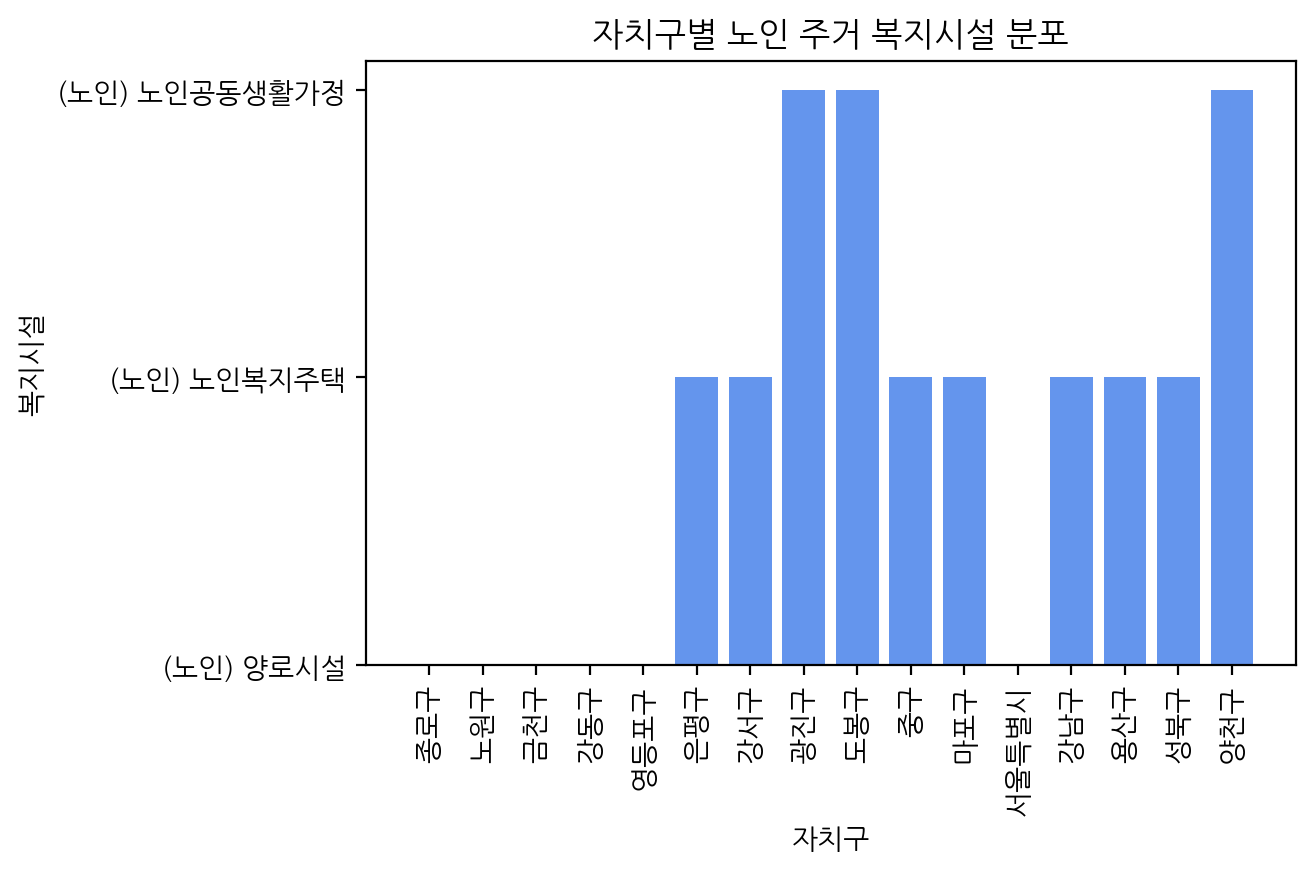

In [25]:
x = df_seoul['시군구명']  # 자치구
y = df_seoul['시설종류명(시설유형)']

# 그래프 생성
plt.figure(dpi=200)  # 그래프 크기 설정
plt.bar(x, y, color='cornflowerblue')  # 막대 그래프 생성
plt.xlabel('자치구')  # x축 레이블 설정
plt.ylabel('복지시설')  # y축 레이블 설정
plt.title('자치구별 노인 주거 복지시설 분포')  # 그래프 제목 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.xticks(rotation=90)
# 그래프 출력
plt.show()

## ex) 강남구 예시

In [34]:
# 사용자가 선택한 자치구
selected_district = '강남구'  #사용자 입력에 따라 변경 가능

# 선택한 자치구에 해당하는 노인 복지 시설 필터링
filtered_facilities = df_seoul[df_seoul['시군구명'] == selected_district]

# 검색 결과 출력
filtered_facilities[['시설명', '시설주소','전화번호']]

,시설명,시설주소,전화번호
18,서울시니어스타워(주)강남본부,"서울특별시 강남구 자곡로 100-2 (자곡동, 서울특별시니어스강남타워)",222233350
23,더시그넘하우스,"서울특별시 강남구 자곡로 204-25 (자곡동)204-25 (자곡동, 더시그넘하우스)",25764400


# 더 진행

In [37]:
# 사용자로부터 자치구 입력 받기
selected_district = input("노인주거복지시설 검색을 원하는 자치구를 입력해주세요 😊 : ")

# 선택한 자치구에 해당하는 노인 복지 시설 필터링
filtered_facilities = df_seoul[df_seoul['시군구명'] == selected_district]

# 선택한 자치구의 정보 출력
if len(filtered_facilities) > 0:
    print(f"{selected_district} 자치구의 노인 복지 시설 정보는 아래와 같습니다! 🔽\n")
    print(filtered_facilities[['시설명', '시설주소', '전화번호']].to_string(index=False))
else:
    print("해당하는 자치구의 노인 복지 시설 정보를 찾을 수 없습니다.")

노인주거복지시설 검색을 원하는 자치구를 입력해주세요 😊 : 노원구
노원구 자치구의 노인 복지 시설 정보는 아래와 같습니다! 🔽

    시설명                           시설주소        전화번호
  홍파양로원     서울특별시 노원구 동일로248길 30 (상계동) 02-939-0735
시립수락양로원 서울특별시 노원구 동일로250길 44-142 (상계동) 02-932-0405


# 3. 노인 복지/주거/의료/여가/기타 시설 검색 서비스 (2 확장)

In [29]:
import pandas as pd
df1 = pd.read_csv('서울시 사회복지시설(재가노인복지시설) 목록.csv', encoding='cp949')
df2 = pd.read_csv('서울시 사회복지시설(노인주거복지시설) 목록.csv', encoding='cp949')
df3 = pd.read_csv('서울시 사회복지시설(노인의료복지시설) 목록.csv', encoding='cp949')
df4 = pd.read_csv('서울시 사회복지시설(노인여가복지시설) 목록.csv', encoding='cp949')
df5 = pd.read_csv('서울시 사회복지시설(노인기타) 목록.csv', encoding='cp949')

## 위 5개 파일 전체 통합.. => 서울시 노인복지시설

In [30]:
df6 = pd.read_csv('서울시 사회복지시설 통합본.csv', encoding = 'cp949')
df6

,시설명,시설코드,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,시군구코드,시군구명,시설주소,정원(수용인원),현인원,전화번호,우편번호
0,참사랑데이케어센터,A0166,(노인) 재가노인복지시설,재가노인복지시설,자치구,최신영,1171000000,송파구,서울특별시 송파구 마천로 89,17.0,16.0,02-3401-5558,5655
1,우리사랑재가노인지원센터,A0564,(노인) 재가노인복지시설,재가노인복지시설,자치구,정춘선,1123000000,동대문구,서울특별시 동대문구 휘경로12길 83(휘경동),40.0,30.0,02-2215-8027,130876
2,동대문실버데이케어센터,A0638,(노인) 재가노인복지시설,재가노인복지시설,자치구,이동수,1100000000,서울특별시,서울특별시 동대문구 약령시로5길 223층 동대문실버데이케어센터,23.0,23.0,02-920-4547,2476
3,한국씨니어노인복지센터,A0681,(노인) 재가노인복지시설,재가노인복지시설,자치구,반명규,1159000000,동작구,서울특별시 동작구 상도로30길 82층,0.0,0.0,02-815-1922,6964
4,목동종합사회복지관병설목동노인복지센터,A0707,(노인) 재가노인복지시설,재가노인복지시설,자치구,유영덕,1147000000,양천구,서울특별시 양천구 목동중앙북로8길 104목동종합사회복지관 2층,24.0,24.0,02-2651-0809,7949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,숭일재가노인복지센터,J4119,(노인) 장기요양기관,노인기타,자치구,황종구,1111000000,종로구,서울특별시 종로구 종로 381-12층호 (숭인동),0.0,0.0,02-3675-5759,3112
1337,장안종합사회복지관 재가장기요양센터,J4748,(노인) 장기요양기관,노인기타,자치구,전명구,1123000000,동대문구,서울특별시 동대문구 한천로18길 48장안종합사회복지관 2층,0.0,73.0,02-2242-7564,2628
1338,백운재가노인복지지원센터,M2058,(노인) 장기요양기관,노인기타,자치구,손병주,1141000000,서대문구,서울특별시 서대문구 연희로156203호,0.0,12.0,02-312-2610,3723
1339,강서구치매지원센터,Z5448,(노인) (기타)노인복지시설,노인기타,자치구,정지향,1150000000,강서구,서울특별시 강서구 화곡로 371경향교회회관 3층,84.0,150.0,02-3663-0943,7590


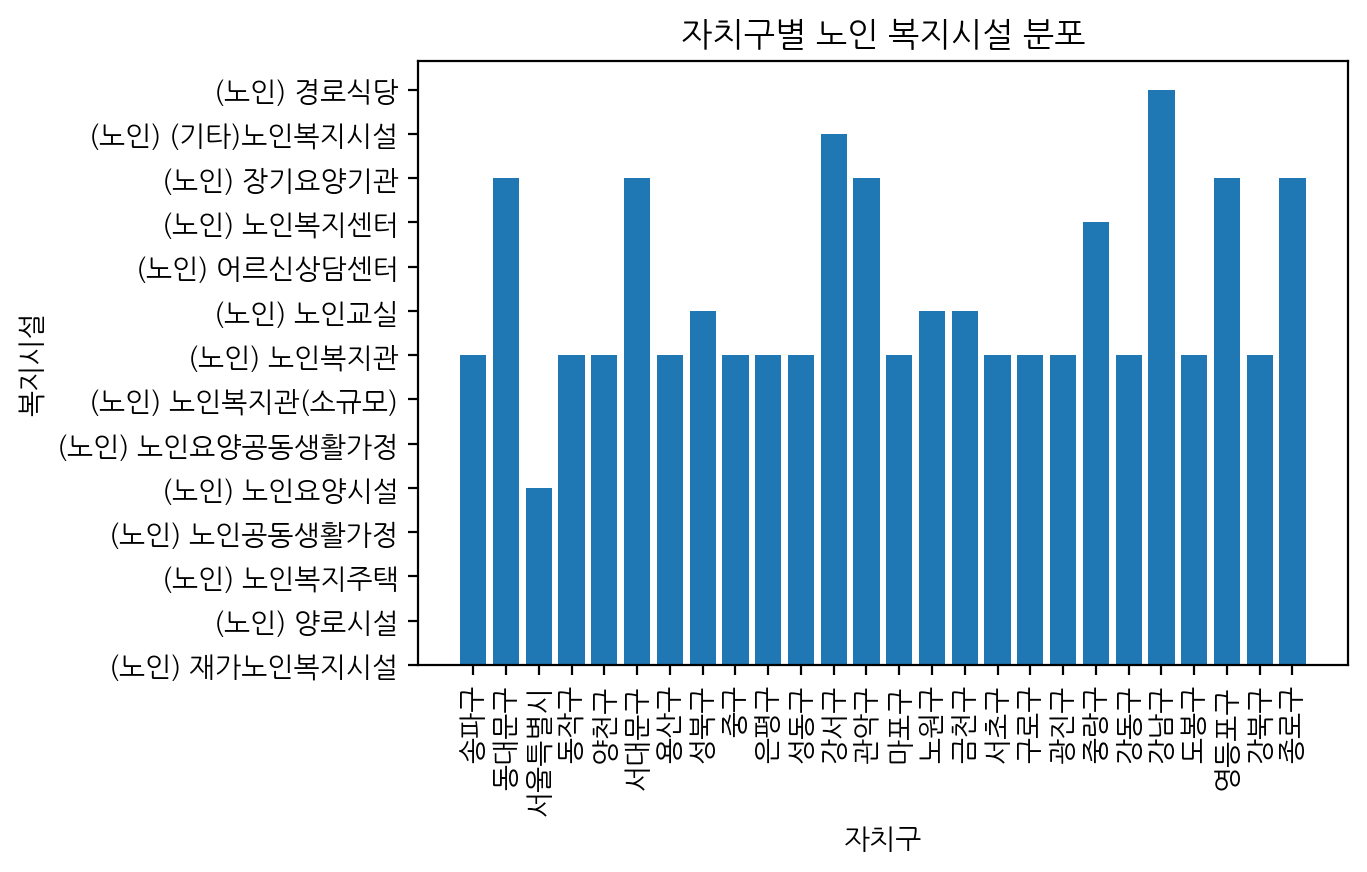

In [39]:
x = df6['시군구명']  # 자치구
y = df6['시설종류명(시설유형)']

# 그래프 생성
plt.figure(dpi=200)  # 그래프 크기 설정
plt.bar(x, y)  # 막대 그래프 생성
plt.xlabel('자치구')  # x축 레이블 설정
plt.ylabel('복지시설')  # y축 레이블 설정
plt.title('자치구별 노인 복지시설 분포')  # 그래프 제목 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.xticks(rotation=90)
# 그래프 출력
plt.show()

## ex) 송파구 예시

In [31]:
selected_district = '송파구'  # 사용자 입력에 따라 변경 가능

# 선택한 자치구에 해당하는 노인 복지 시설 필터링
filtered_facilities = df6[df6['시군구명'] == selected_district]

# 검색 결과 출력
filtered_facilities[['시설명', '시설주소','전화번호']]

,시설명,시설주소,전화번호
0,참사랑데이케어센터,서울특별시 송파구 마천로 89,02-3401-5558
24,송파노인복지센터,서울특별시 송파구 백제고분로41길 19-24신원빌딩,02-2202-3677
30,송파치매주.야간보호센터,서울특별시 송파구 백제고분로32길 41,02-3431-6736
35,그린리버노인복지센터,서울특별시 송파구 성내천로 1894층,02-406-2688
49,엘림노인복지원,서울특별시 송파구 거마로3길 14-32층,02-3012-8004
...,...,...,...
1224,가락사랑요양원,"서울특별시 송파구 오금로36길 57, 3층 (가락동)",24030311
1225,가족사랑요양원,"서울특별시 송파구 오금로36길 57, 2층 (가락동)",24030311
1245,송파노인종합복지관,서울특별시 송파구 백제고분로32길 41,02-2203-9400
1279,송파실벗뜨락,"서울특별시 송파구 백제고분로42길 55,6층",24139999


In [38]:
# 사용자로부터 자치구 입력 받기
selected_district = input("노인복지시설 검색을 원하는 자치구를 입력해주세요 (복지/주거/의료/여가/기타) 😊 : ")

# 선택한 자치구에 해당하는 노인 복지 시설 필터링
filtered_facilities = df6[df6['시군구명'] == selected_district]


# 선택한 자치구의 정보 출력
if len(filtered_facilities) > 0:
    print(f"{selected_district} 자치구의 노인 복지 시설 정보는 아래와 같습니다! 🔽\n")
    print(filtered_facilities[['시설명', '시설주소', '전화번호']].to_string(index=False))
else:
    print("해당하는 자치구의 노인 복지 시설 정보를 찾을 수 없습니다.")


노인복지시설 검색을 원하는 자치구를 입력해주세요 (복지/주거/의료/여가/기타) 😊 : 서대문구
서대문구 자치구의 노인 복지 시설 정보는 아래와 같습니다! 🔽

                시설명                                      시설주소         전화번호
         효림재가노인지원센터                서울특별시 서대문구 경기대로9길 62-01-38  02-313-5124
           효림데이케어센터                    서울특별시 서대문구 경기대로9길 624층  02-313-5124
           홍은데이케어센터          서울특별시 서대문구 홍은중앙로9길 21홍은중앙로9길 21   02-391-1355
 시립서대문노인종합복지관주간보호센터                 서울특별시 서대문구 독립문로8길 57(천연동)  02-363-9980
        구립서대문데이케어센터                서울특별시 서대문구 홍지문2길 59-0(홍은동)  02-392-3080
           연희데이케어센터                   서울특별시 서대문구 성산로 271(연희동)  02-333-9910
        중앙소규모요양시설나형                     서울특별시 서대문구 서소문로 43-49  02-362-9262
        구립북가좌데이케어센터                서울특별시 서대문구 증가로20길43 (북가좌동)     23763080
       구립연희안산데이케어센터                       서울특별시 서대문구 연희로29길 5  02-335-0316
           여민데이케어센터                서울특별시 서대문구 증가로4길58-6 (홍은동)     23953662
           굿 데이케어센터              서울특별시 서대문구 연희로 165, 2층 (연희동)     23237050
          남